In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class DataCenter:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# 生成数据集
def generate_dataset(start, stop, n_samples):
    x = np.linspace(start, stop, n_samples)
    y = 2*np.sin(0.5*x) + np.random.normal(0, 0.5, n_samples)
    return DataCenter(x, y)

# 生成训练数据集
def generate_train_data(start, stop, n_samples):
    train_data = []
    for n in n_samples:
        train_data.append(generate_dataset(start, stop, n))
    return train_data

# 生成测试数据集
def generate_test_data(start, stop, n_samples):
    test_data = []
    for n in n_samples:
        test_data.append(generate_dataset(start, stop, n))
    return test_data

In [23]:
S, M, L = generate_train_data(-5, 5, [10, 30, 60])
T_S, T_M, T_L = generate_test_data(-10, 10, [20, 40, 80])

In [24]:
# 线性基函数
def linear_basis_function(x, k):
    extend_x = np.zeros((x.shape[0], k))
    for i in range(k):
        extend_x[:, i] = np.power(x, i)
    return extend_x

# 线性回归模型
def linear_regression_model(x, y, k):
    extend_x = linear_basis_function(x, k)
    w = np.linalg.inv(extend_x.T @ extend_x) @ extend_x.T @ y
    return w

# 预测
def predict(x, w):
    extend_x = linear_basis_function(x, w.shape[0])
    y_pred = extend_x @ w
    return y_pred

def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true - y_pred, 2)))

In [25]:
train_data = [S, M, L]
test_data = [T_S, T_M, T_L]
data_set = ['S', 'M', 'L']

# 训练并画图
def train_and_show(K = [2, 4, 8]):
    for k in K:
        train(k)

# 对每一个k，分别在[S, M, L]上训练
def train(k):
    train_result = []
    for i in range(3):
        model = linear_regression_model(train_data[i].x, train_data[i].y, k)
        pred = predict(test_data[i].x, model)
        rmse_a = rmse(test_data[i].y, pred)
        train_result.append([k, model, rmse_a])
    show(train_result)

# 对每一个k，分别画对[S, M, L]训练的结果
def show(train_result):
    sin_x = np.linspace(-10, 10, 200)
    sin_y = 2*np.sin(0.5*sin_x)
    plt.figure(figsize=(14, 5))
    for i, (k, model, rmse_a) in enumerate(train_result):
        plt.subplot(1,3,i+1)
        plt.title(f'K={k} {data_set[i]} RMSE={rmse_a}')
        plt.plot(sin_x, sin_y,label='sin_curve')
        plt.plot(train_data[i].x, train_data[i].y, 'r*', label='train_samples', markersize=5)
        plt.plot(test_data[i].x, test_data[i].y, 'go', label='test_samples', markersize=5)
        plt.plot(sin_x, predict(sin_x, model), label='MLE_curve')
        plt.xlim((-10, 10))
        plt.ylim((-5, 5))
        plt.legend()

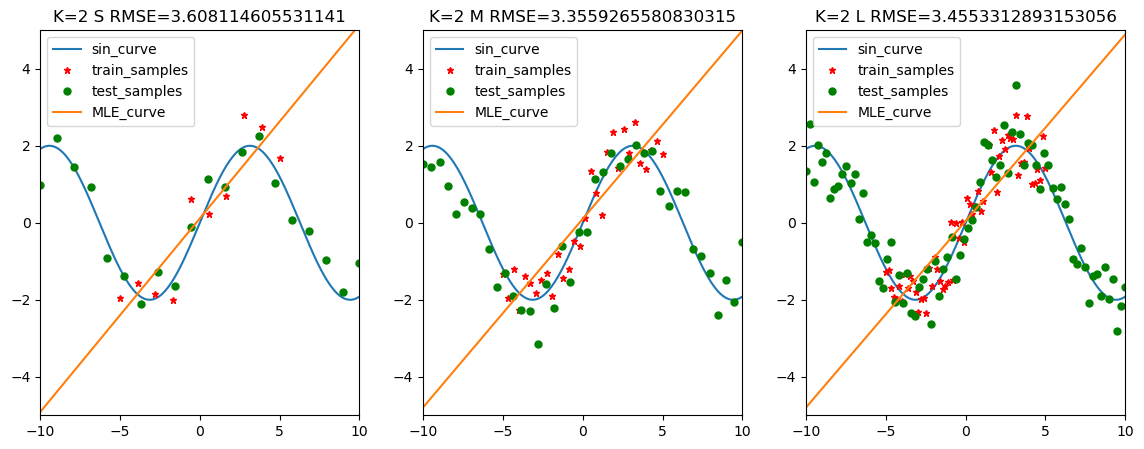

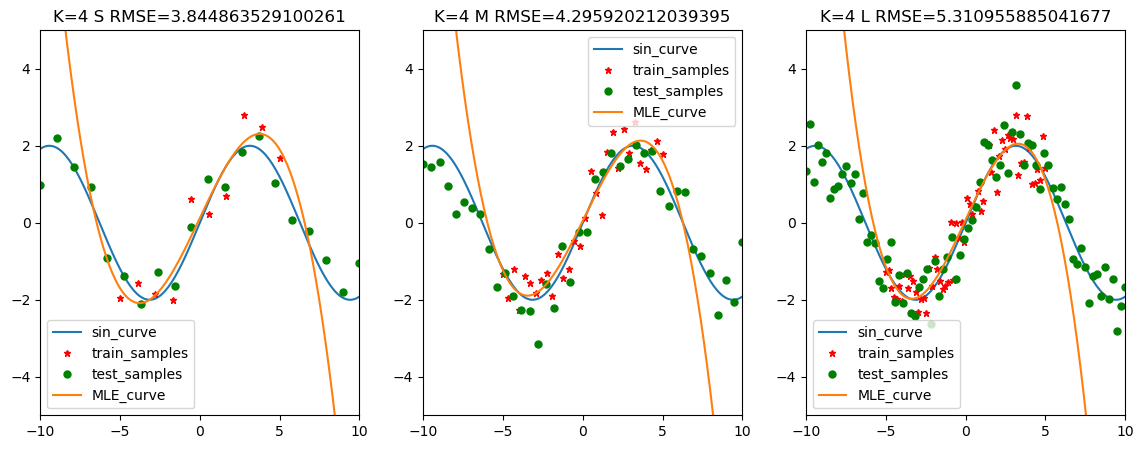

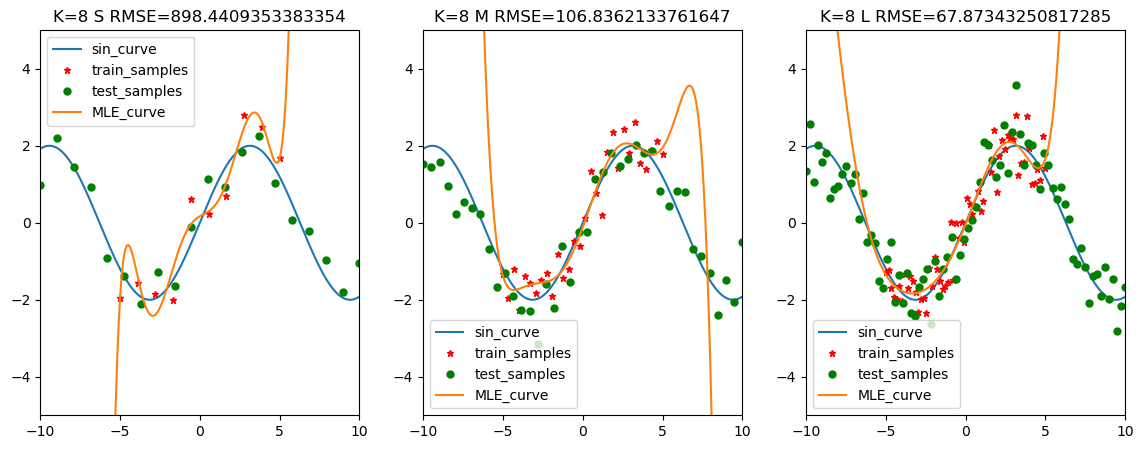

In [26]:
train_and_show()